<font size="5"> KINGDOM OF SAUDI ARABIA<br>
Ministry of Higher Education<br>                                  
Al-Imam Mohammad University<br>
College of Computer & Information Sciences<br><br>
    

**Deep Learning (CS464), Winter 2023**
<br>**Instructor:
Dr. Haifa al-kasem**
<br><br>
**Prepared by:**<br>
- Khloud Alnufaie (440020617)<br>
- Raghad Albosais (440020209)<br>
- Weaam Alghaith (440023306)<br>


**Section: 371**

## Contents<br><br>

<font size="4">

1. Introducation<br> 
    1.1 Problem statement<br>
    1.2 Problem formulation<br>
    1.3 Dataset<br>
    1.4 Model architecture<br>
    1.4.1 Bidirectional Encoder Representations from Transformers (Bert)<br>
    1.4.2 Proposed Architecture <br>
2. Import resources <br>
3. Preparing the data<br>
    3.1 Loading the data<br>
    3.2 Exploring and Visualizing the data<br>
    3.3 Preprocess the data<br>
    3.4 Merge dataset<br>
    3.5 Splitting the data into train and test<br>
    3.6 Tokenazation<br>
4. Model development<br>
    4.1 Dsign BERT model<br>
    4.2 FakeNews classification using BERT model<br>
5. Model evaluation<br>
6. Model inference/Prediction<br>
7. Save the model<br>
8. Analyze the results
9. Conclusion 


# 1. Introducation

   1.1. Problem statement<br>
<font size="3">
In recent years, the growth of online social media has greatly facilitated communication among people. Online social media allows users to share information, connect with others, and stay updated on current news. The news can be presented in different formats in social media, such as articles. In the articles, the information is provided in a more formal way, which makes it more suitable for world, politics, and government news. While these articles are being shared on social media every day, it is not always credible, and some of it has been designed to mislead. Fake news is often used to describe such content. Fake news “is fabricated information that mimics news media content in form but…lack(s) the news media’s editorial norms and processes for ensuring the accuracy and credibility of information”. It overlaps with misinformation (false or misleading information) and disinformation (false information purposely spread to mislead people). One example of sophisticated fake news is “deepfakes”. Deepfakes are fictional videos or images or text with either well-known or made-up people doing, or saying, things that are not real. This is created using artificial intelligence and machine learning. 
<br><br>
   1.2. Problem formulation<br>
<font size="3">
- Task (T)	Classify an article to a real or a fake.<br>
- Experience (E)	A collection of real and fake articles.<br>
- Performance (P)	Classification evaluation metrics, which is accuracy, precision and recall. All of them are calculated based on the confusion matrix part (TP, TN, FP, FN) Accuracy:  it is the total number of TP and TN divided by total number of TP and TN and FP and FN.
Precision: it is the number of TP divided by the total number of TP and TN.
Recall: it is the number of TP divided by the total number of TP and FN.


<br><br>
   1.3. Dataset<br>
<font size="3">

ISOT Fake News Dataset includes both fake and real news articles. This dataset is collected and provided in this IOST research lab [1]. Articles were retrieved by crawling Reuters.com (News website) for truthful articles. Several sources were used to collect the fake news articles. It is important to note that the fake news articles were gathered from unreliable websites that were flagged by Politifact (a fact-checking organization in the United States) and Wikipedia. Various types of articles are included in the dataset. Nevertheless, most articles cover political and world news topics. The full description of the dataset is shown in Figure 1. Note that, both of the real and fake set was cleaned and preprocessed, except that there are punctuations in fake set. We conducted two experiments in our implementation, one without removing the punctuation and another with removing them. Regarding the splitting of the dataset, we use 60, 20, 20 ration to split the dataset into train, test and validation, respectively. At the preprocessing step, we just split the dataset into training and testing, while the validation set has been split during training. We use this ratio of splitting since it is most commonly used in previous projects that work in this dataset for the same task, by using this ratio, our model produces high performance. 

Dataset available:https://onlineacademiccommunity.uvic.ca/isot/2022/11/27/fake-news-detection-datasets/.

<br><br>
   1.4. Model architecture<br>
<font size="3">

1.4.1 Bidirectional Encoder Representations from Transformers (Bert)
<br>
Bert stands for Bidirectional Encoder Representations from Transformers. Bert is a deep learning model used in several tasks in NLP, such as Question Answering, Text summarization, and Classification. Also, Bert is used in the Google search engine and Response selection when you write an email. There are two types of Bert base and large. Bert base has 12 Encoder Layers (L) = 12, Attention Heads (A) = 12, Hidden Size (H) = 768, while Bert large has Encoder Layers (L) = 24, Attention Heads (A) = 16, Hidden Size (H) = 1024. The architecture is a stack of encoders. The encoder part is inherited from the transformer. A transformer is an artificial neural network architecture used in deep learning applications to solve the problem of transforming input sequences into output sequences. Transformers contain two components: encoder and decoder. We will focus on the encoder since we need the machine to understand the context to help us classify fake news.The transformers are better than RNN and LSTM for many reasons:
(i).	Transformers use non-sequential processing: Sentences are processed as a whole, rather than word by word.
(ii).	Long-term memory transformers have much higher bandwidth and do not struggle with longer dependencies like RNN and LSTM.
(iii).	The transformer is deeply bidirectional.

1.4.2 Proposed Architecture 
<br>
![Model architecture](https://raw.githubusercontent.com/hkh7897/q/main/proposed%20model.jpg?token=GHSAT0AAAAAAB6U2VJ35XLTUJCKKNNEXPGQY7HTEVA)
<br>
Our model architecture is shown in Figure above. We use the title and content of the articles as input to our model, instead of using only the title or only the content. Because we want to preserve the important terms that help to make the final decision. For preprocessing step, we perform a cleaning processing (punctuation marks removal) for fake sets only in order to remove unhelpful parts of the data, or noise and keep only the words. In addition, we perform linguistics processing (tokenization) for both sets in order to make it in suitable format for the feature extractor (BERT). Tokenization is the process to split the sentence into words with their unique integer values. 
 






# **2. Import Resources**

In [ ]:
#pd :package used for data analysis and manipulation tool
import pandas as pd
#sns :module to read and write tabular data in CSV(spreadsheets) format.
import csv
#plt :module to import name for opencv-python  library to solve computer vision problems.
import matplotlib.pyplot as plt
#sns :library for data visualization
import seaborn as sns
#rcParams :containing the default styles for every plot element you create.
from matplotlib import rcParams
#WordCloud :module For generating word cloud.
from wordcloud import WordCloud
#NumPy :is a Python library used for convert list to arrays.
import numpy as np 
#String :module contains some constants, utility function, and classes for string manipulation.
import string as st


#joblib :is tool used to save the model for deployment.
import joblib


#AutoTokenizer :create a class of the relevant architecture(BertModel).
from transformers import AutoTokenizer
#tensorflow :is a free and open-source software library for artificial intelligence.
import tensorflow as tf
#keras :is an open-source software library that provides a Python interface for artificial neural networks.
from tensorflow import keras
#models :groups layers into an object with training and inference features.
from tensorflow.keras import  models
#Sequential :class groups a linear stack of layers
from tensorflow.keras.models import Model, Sequential
#input :function is used to instantiate a Keras tensor.
#Dense :class of layer that contains all the neurons that are deeply connected within themselves.
#Dropout :class for randomly sets input units to 0 with a frequency of rate at each step during training time.
#Embedding :clas turns positive integers (indexes) into dense vectors of fixed size.
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding
#Adam :class optimizer that implements the Adam algorithm.
from tensorflow.keras.optimizers import Adam
#TFBertModel :class is used to instantiate a BERT model and store the configuration of a TFBertModel.
from transformers import TFBertModel
#EarlyStopping :class is Stop training when a monitored metric has stopped improving.
from tensorflow.keras.callbacks import EarlyStopping

#confusion_matrix: to dealing and show confusion_matrix
from sklearn.metrics import confusion_matrix
#plot_confusion_matrix :Utility function for visualizing confusion matrices via matplotlib
from mlxtend.plotting import plot_confusion_matrix
#precision_score : evaluation metric for train and test sets 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

# **3. Preparing The Data**

## 3.1 Loading the data

In [ ]:
# load the paths of news.
true_path = 'News _dataset/True.csv'
fake_path = 'News _dataset/Fake.csv'


In [ ]:
#Read a comma-separated values (csv) file into DataFrame.
#Read true news and fake news to DataFrame.
df_true= pd.read_csv(true_path)
df_fake = pd.read_csv(fake_path)

## 3.2 Exploring and Visualizing the data

In [ ]:
# Print the first 5 entries of the True news DataFrame.
df_true.head(5)

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [ ]:
# Print the first 5 entries of the fake news DataFrame.
df_fake.head(5)

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


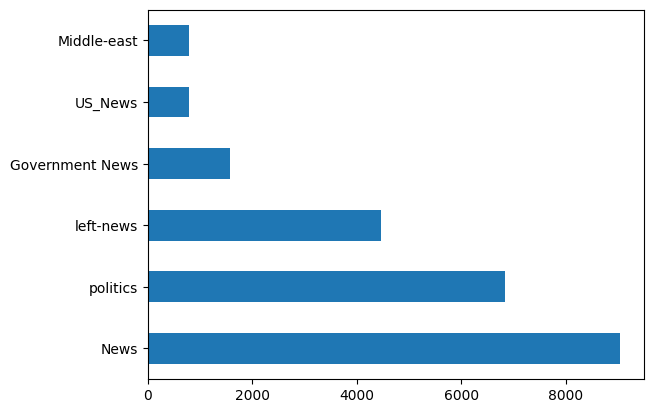

In [ ]:
#visualize subject and number of news in each subject for fake news DataFrame.
df_fake['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

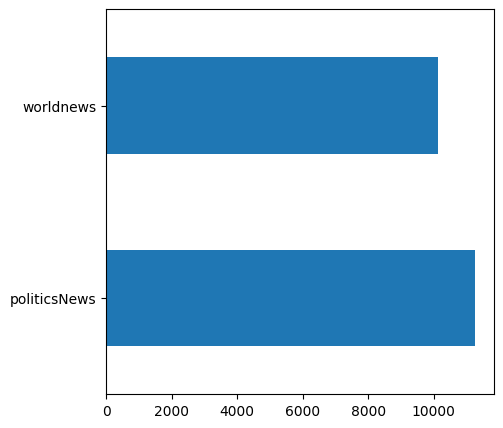

In [ ]:
#visualize subject and number of news in each subject for true news DataFrame.
df_true['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

In [ ]:
#Printing the count of news for each Subject
print("Fake News Subject : ",dict(df_fake.subject.value_counts()))
print("True News Subject : ",dict(df_true.subject.value_counts()))

Fake News Subject :  {'News': 9050, 'politics': 6841, 'left-news': 4459, 'Government News': 1570, 'US_News': 783, 'Middle-east': 778}
True News Subject :  {'politicsNews': 11272, 'worldnews': 10145}


Fake    23481
True    21417
Name: Label, dtype: int64

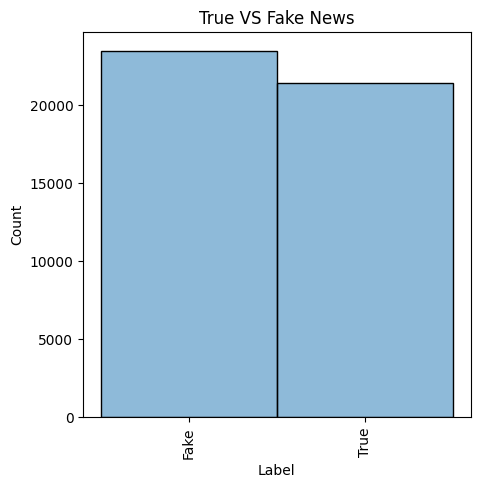

In [ ]:
#to see whether the data is balanced or not.
#concatnate df_fake and df_true into one DataFrame.
df = pd.concat([df_fake,df_true])
#create bar chart of the number of examples per classes
sns.histplot(df.Label, alpha = 0.5)
plt.tick_params(axis = 'x', rotation = 90)
#set the title
plt.title('True VS Fake News')
#to print count of news of each label 
df.Label.value_counts()

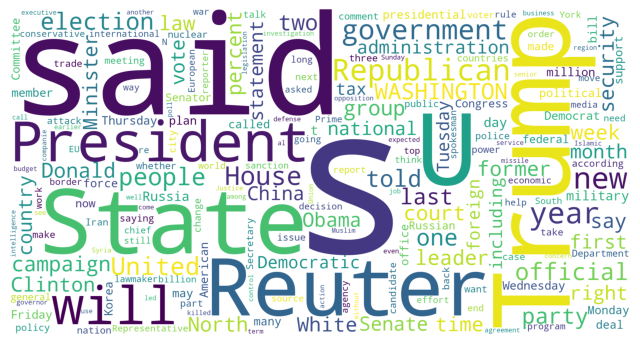

In [ ]:
#convert array text to list.
wordcld_true=" ".join(df_true["text"].tolist())
#creating word_cloud with text as argument in .generate() method
wordcloud=WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(wordcld_true)
#set size of figure                      
fig=plt.figure(figsize=(8,8))
#draws an image on the current figure
plt.imshow(wordcloud)
#set axis of figure off 
plt.axis("off")
#show the worldcloud figure
plt.show()

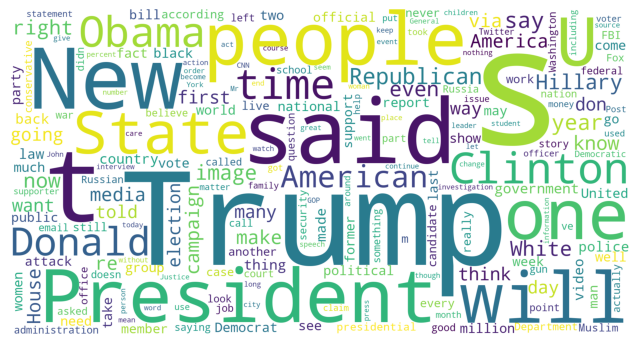

In [ ]:
#convert array text to list.
wordcld_fake=" ".join(df_fake["text"].tolist())
# Creating word_cloud with text as argument in .generate() method
wordcloud=WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(wordcld_fake)
#set size of figure                      
fig=plt.figure(figsize=(8,8))
#draws an image on the current figure
plt.imshow(wordcloud)
#set axis of figure off 
plt.axis("off")
#show the worldcloud figure
plt.show()

In [ ]:
#to print smaple of news from True and Fake 
print("This is smaple of true NEWS")

#Explore one example of true for read, the title 
print("the title : ")
print(df_true.title[500])

#Explore one example of true for read, the content
print("the content : ")
print(df_true.text[500])
print('\n\n')

print("This is smaple of fake NEWS")

#Explore one example of fake for read, the title 
print("the title : ")
print(df_fake.title[500])

#Explore one example of fake for read, the content
print("the content : ")
print(df_true.text[500])

This is smaple of true NEWS
the title : 
Senate panel votes to advance tax bill
the content : 
WASHINGTON (Reuters) - The U.S. Senate Budget Committee voted along party lines on Tuesday to send a Republican tax bill to the full Senate for a vote. The 12-to-11 vote “moves us one step closer to a simpler, fairer, and more transparent tax system,” Budget Committee Chairman Mike Enzi said in a statement.  The full Senate is expected to begin debating the tax bill and vote on it sometime this week. The Republican-controlled House of Representatives has already passed its version of a package of tax cuts. 



This is smaple of fake NEWS
the title : 
 Trump’s Latest Retweet Is Actually The Best Possible Metaphor For His Presidency (IMAGE)
the content : 
WASHINGTON (Reuters) - The U.S. Senate Budget Committee voted along party lines on Tuesday to send a Republican tax bill to the full Senate for a vote. The 12-to-11 vote “moves us one step closer to a simpler, fairer, and more transparent tax 

In [ ]:
#Inspect Lengths of title
#save titles 
titles = [text for text in df.title]
#set max to zero and min for max vlaue of title
max_len = 0
min_len = 42
#titles_len to collect titles length for compute mean 
titles_len = []
#loop to find min and max titles 
for title in titles:
    #add title length to titles_len
    titles_len.append(len(title.split()))
    #put the maxmum title between them into max_len
    max_len = max(len(title.split()), max_len)
    #put the minimum title between them into min_len
    min_len = min(len(title.split()), min_len)
#printing the Mean,Max and Min
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('min length of the texts:', min_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
min length of the texts: 1
Mean length of the titles: 12.453472315025168


In [ ]:
#Inspect Lengths of content
#save texts
texts = [text for text in df.text]
#set max to zero and min for max vlaue of texts
max_len = 0
min_len = 8122
#texts_len to collect texts length for compute mean 
texts_len = []
for text in texts:
    #add texts length to texts_len
    texts_len.append(len(text.split()))
    #put the maxmum text between them into max_len
    max_len = max(len(text.split()), max_len)
    #put the minimum text between them into min_len
    min_len = min(len(text.split()), min_len)
#printing the Mean,Max and Min
print('Number of text:', len(texts))
print('Max length of the texts:', max_len)
print('min length of the texts:', min_len)
print('Mean length of the texts:', np.mean(texts_len))

Number of text: 44898
Max length of the texts: 8122
min length of the texts: 0
Mean length of the texts: 404.9638736692058


## 3.3 pre-processing: Remove punctuations

In [ ]:
#definition to remove all punctuations from the text
def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [ ]:
#remove punctuations from fake news
#the overwtite to text in fake news DataFrame 
df_fake['text'] = df_fake['text'].apply(lambda x: remove_punct(x))
#show head to check text after remove punctuations
df_fake.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,On Friday it was revealed that former Milwauke...,News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,On Christmas day Donald Trump announced that h...,News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


## 3.4 Merge dataset

In [ ]:
#merging fake and true news DataFrame to one DataFrame 
df = pd.concat([df_fake,df_true])
#after merging both the DataFrames and Shuffling it.
df = df.sample(frac=1).reset_index(drop=True)
#display after merging 
df.head(5)

,title,text,subject,date,Label
0,Bangladesh detains leaders of Islamist party f...,DHAKA (Reuters) - Bangladesh police have detai...,worldnews,"October 10, 2017",True
1,WATCH: TWO TX SCHOOL WORKERS FIRED For Refusin...,Because 6 year old girls are consumed with the...,left-news,"Apr 27, 2016",Fake
2,Fox & Friends Ignores FBI Director’s Trump Bo...,Fox Friends continues to embarrass themselves...,News,"March 21, 2017",Fake
3,Turkey issues warning over travel to U.S. afte...,ANKARA (Reuters) - Turkey warned its citizens ...,politicsNews,"November 12, 2016",True
4,House tax chief says Obamacare taxes not part ...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,"March 27, 2017",True


In [ ]:
#Let’s check whether we have any missing values
df.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

## 3.5 Splitting the data into train and test	

In [ ]:
# Let’s perform the train-test-split of Data
from sklearn.model_selection import train_test_split
#considering text and title as X and overwrite to text
df["text"] = df["title"]+df["text"] 
#the Label column is in Object format, let's Encode it to Numerical format 1 for true 0 for fake.
df['Label'] = df['Label'].map({'True':1, 'Fake':0})
#display after encoding and merge title with text
df.head(5) 

,title,text,subject,date,Label
0,Bangladesh detains leaders of Islamist party f...,Bangladesh detains leaders of Islamist party f...,worldnews,"October 10, 2017",1
1,WATCH: TWO TX SCHOOL WORKERS FIRED For Refusin...,WATCH: TWO TX SCHOOL WORKERS FIRED For Refusin...,left-news,"Apr 27, 2016",0
2,Fox & Friends Ignores FBI Director’s Trump Bo...,Fox & Friends Ignores FBI Director’s Trump Bo...,News,"March 21, 2017",0
3,Turkey issues warning over travel to U.S. afte...,Turkey issues warning over travel to U.S. afte...,politicsNews,"November 12, 2016",1
4,House tax chief says Obamacare taxes not part ...,House tax chief says Obamacare taxes not part ...,politicsNews,"March 27, 2017",1


In [ ]:
# X : text, y: labels
#Split data into test and train datasets 
#training set : 80% 
#testing set : 20%
X_train, X_test, y_train, y_test = train_test_split(df["text"], df['Label'], 
stratify = df['Label'], test_size = 0.2, random_state = 10)

#printing the number of news train and test sets.
print("train example numbers : {}".format(X_train.shape[0]))
print("test example numbers: {}".format(X_test.shape[0]))

## 3.6 Tokenaization 

In [ ]:
#defination tokenize for splitting up text to word
def tokenize(X):
      X = tokenizer(
        #creates a list of texts
        text = list(X),
        #dictionary of special tokens 
        #If special tokens are NOT in the dictionary, they are added to it
        add_special_tokens = True,
        #will limit the total sequence returned so that it has a max_length = 100
        #If there are overflowing tokens, those will be added to the returned dictionary
        max_length = 100,
        #Iteratively reduce the inputs sequence until the input is under max_length 
        #starting from the longest one at each token
        truncation = True,
        #the returned sequences will be padded up to max_length = 100
        padding = 'max_length',
        #to return TensorFlow
        return_tensors = 'tf',
        #don't return token type IDs
        return_token_type_ids = False,
        #return attention mask where is a binary tensor indicating the position of the padded indices so 
        #that the model does not attend to them.
        return_attention_mask = True,
        #for produce logging output.
        verbose = True
        )
      #return dictionary of tokens
      return X

In [ ]:
#we will use AutoTokenizer for tokenization
#Since we are using the BERT BASE Model for our application
#we have also used the corresponding AutoTokenizer for tokenization
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
#Let’s tokenize the texts in train and test sets 
X_train_tokens = tokenize(X_train)
X_test_tokens = tokenize(X_test)

2023-02-04 09:45:47.479426: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-02-04 09:45:47.480423: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2023-02-04 09:45:47.480778: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-02-04 09:45:47.480846: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-02-04 09:45:47.483443: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-02-04 09:45:47.483827: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-

# **4. Model Development**

## 4.1 Design BERT Model 

In [ ]:
#length of input =100
Length = 100
#definitation to get model 
def get_model():
  #set dropout present to 20% of neuron will drop out
  dropout_rate = 0.2
  #two input layer input_ids and input_mask 
  input_ids = Input(shape = (Length,), dtype = tf.int32, name = 'input_ids')
  input_mask = Input(shape = (Length,), dtype = tf.int32, name = 'input_mask')


  #enter input layers to BERT model 
  embeddings = bert([input_ids, input_mask])[1] #pooler output
  print(embeddings)
  #then enter to dropout layer one
  out = Dropout(0.2)(embeddings)
  #then enter to dense layer one

  out = Dense(64,activation = 'relu')(out)
  #then enter to dropout layer two
  out = Dropout(0.2)(out)
  #then enter to dense layer one 
  y = Dense(1,activation = 'sigmoid')(out)

  #create Model to compile and fit  
  model = Model(inputs=[input_ids, input_mask], outputs=y)
  #to set layer's 2 BERT model weights trainable
  model.layers[2].trainable = True

  
  #define optimizer
  optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
  #complile the model
  model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

  return model

In [ ]:
#we will use TFBertModel for BERT base model 
#Loading the BERT Model 
bert = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#Let’s get model and summary of the BERT Model Created
model = get_model()
model.summary()

Tensor("tf_bert_model_2/Identity_1:0", shape=(None, 768), dtype=float32)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 100)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 input_mask[0][0]                 
__________________________________________________________________________________________________
dropout_41 (Dropout

## 4.2 FakeNews classification using BERT model 

In [ ]:
#training our model
#input_ids = X_train_tokens['input_ids']
#input_mask = X_train_tokens['attention_mask']
#label y = y_train
#for validation_split we set to 20% so the training will be 60% and validation will be 20% 
#callbacks when val_accuracy stop improvment 
history = model.fit(x = {'input_ids':X_train_tokens['input_ids'],'input_mask':X_train_tokens['attention_mask']}, 
                    y = y_train, epochs=3, validation_split = 0.2, batch_size = 64, 
                    callbacks=[EarlyStopping( monitor='val_accuracy' ,mode='max', patience=3,verbose=False,
                                             restore_best_weights=True)])

Epoch 1/3
449/449 [==============================] - 5625s 13s/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/3
449/449 [==============================] - 5642s 13s/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 5.3801e-04 - val_accuracy: 1.0000
Epoch 3/3
449/449 [==============================] - 5717s 13s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.6285e-04 - val_accuracy: 1.0000


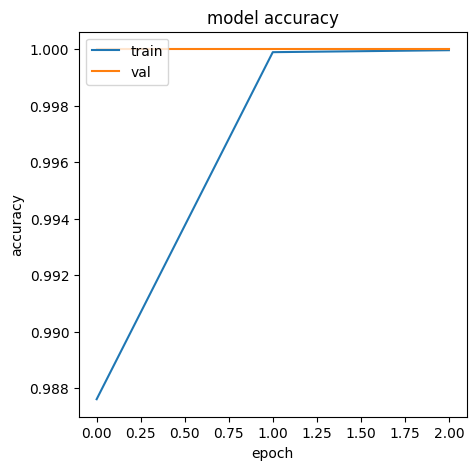

In [ ]:
# summarize history for accuracy
#get train accuracy 
plt.plot(history.history['accuracy'])
#get validation accuracy
plt.plot(history.history['val_accuracy'])
#set title of chart 
plt.title('model accuracy')
#set x-axis = epochs and y-axis= accuracy
plt.ylabel('accuracy')
plt.xlabel('epoch')
#set legend of chart 
plt.legend(['train', 'val'], loc='upper left')
#display chart 
plt.show()

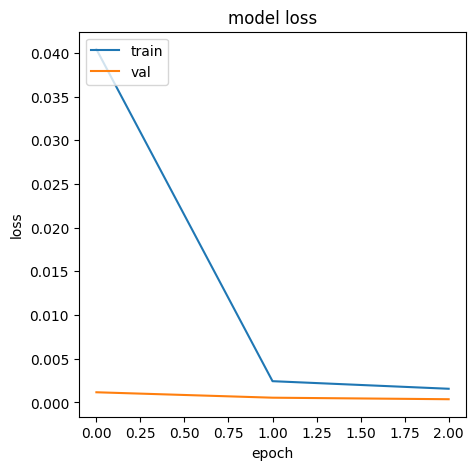

In [ ]:
# summarize history for loss
#get train loss
plt.plot(history.history['loss'])
#get validation loss
plt.plot(history.history['val_loss'])
#set title of chart 
plt.title('model loss')
#set x-axis = epochs and y-axis= loss
plt.ylabel('loss')
plt.xlabel('epoch')
#set legend of chart 
plt.legend(['train', 'val'], loc='upper left')
#display chart 
plt.show()

# **5. Model evaluation**

**make predctions**

In [ ]:
#Make predction on train dataset
y_pred_tr =np.where(model.predict({ 'input_ids' : X_train_tokens['input_ids'] ,
 'input_mask' : X_train_tokens['attention_mask']}) >=0.5,1,0)

In [ ]:
#Make predction on test dataset
y_pred =np.where(model.predict({ 'input_ids' : X_test_tokens['input_ids'] ,
 'input_mask' : X_test_tokens['attention_mask']}) >=0.5,1,0) 

**confusion metrix**

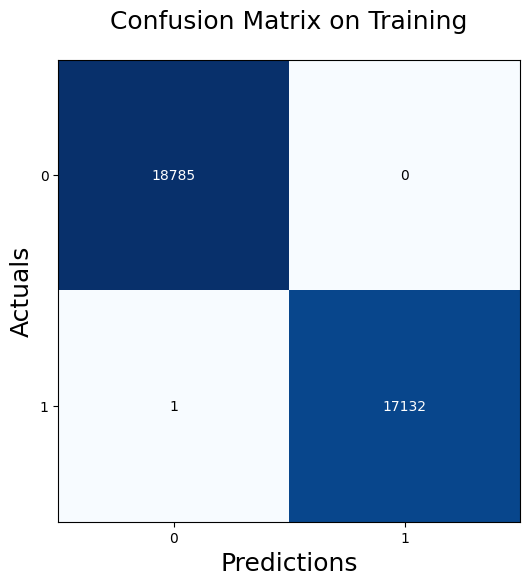

In [ ]:
#Confusion matrix for train (0 = Fake )(1 = True)
#Build the confusion matrix for label prediction in traning dataset
conf_matrix = confusion_matrix(y_train,y_pred_tr)
#Build the display plot that display the confusion matrix 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
#set x as Predictions
plt.xlabel('Predictions', fontsize=18)
#set y as actual label
plt.ylabel('Actuals', fontsize=18)
#set title 
plt.title('Confusion Matrix on Training', fontsize=18)
#display confusion matrix
plt.show()

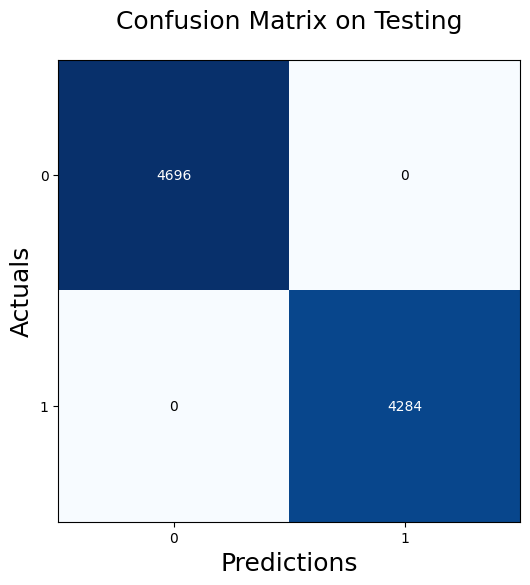

In [ ]:
#Confusion matrix for test (0 = Fake )(1 = True)
#Build the confusion matrix for label prediction in testing dataset
conf_matrix = confusion_matrix(y_test,y_pred)
#Build the display plot that display the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
#set x as Predictions
plt.xlabel('Predictions', fontsize=18)
#set y as actual label
plt.ylabel('Actuals', fontsize=18)
#set title 
plt.title('Confusion Matrix on Testing', fontsize=18)
#display confusion matrix
plt.show()

**Loss of test set**

In [ ]:
#evaluate model to get loss of testing set
test_loss, test_score = model.evaluate({ 'input_ids' : X_test_tokens['input_ids'] ,
 'input_mask' : X_test_tokens['attention_mask']}) 
#printing loss of testing set
print("Loss on test set: ", test_loss)

281/281 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Loss on test set:  0.0


**Accuracy, precision, recall and F1 score on train and test dataset**

In [ ]:
# calculate each evaluation matrics in training and testing prediction
# traning: to see the overfitting and underfitting
# testing: to see how well our model does

print('The training accuracy: ' + str(accuracy_score(y_train, y_pred_tr)))
print('The testing accuracy: '+ str(accuracy_score(y_test, y_pred)))

print('\n')

print('The traning precision: ' + str(precision_score(y_train, y_pred_tr)))
print('The testing precision: ' + str(precision_score(y_test, y_pred)))

print('\n')

print('The traning recall: ' + str(recall_score(y_train, y_pred_tr)))
print('The testing recall: ' + str(recall_score(y_test, y_pred)))

print('\n')

print('The traning F1: ' + str(f1_score(y_train, y_pred_tr)))
print('The testing F1: ' + str(f1_score(y_test, y_pred)))

The training accuracy: 0.9999721588061696
The testing accuracy: 1.0


The traning precision: 1.0
The testing precision: 1.0


The traning recall: 0.9999416331057025
The testing recall: 1.0


The traning F1: 0.9999708157011528
The testing F1: 1.0


# **6. Model prediction/inference**

In [ ]:
#Custom data prediction
#text get it from kaggle : https://www.kaggle.com/code/sadikaljarif/fake-news-detection-using-bert
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"
#Let’s tokenize the texts
test_token = tokenize(test_text)

In [ ]:
#predict the text of test_token
#input_ids = test_token['input_ids']
#input_mask = test_token['attention_mask']
test_text_pred = np.where(model.predict({ 'input_ids' : test_token['input_ids'] , 
                    'input_mask' : test_token['attention_mask']}) >=0.5,1,0)

In [ ]:
#printing the result pf predicted 
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is True")

News is Fake


# **7. Save the model**

In [ ]:
saved_keras_model_filepath = './model_saved'
model.save(saved_keras_model_filepath)

# **8. Analyze the resultsl**


First of all, the dataset was already cleaned and processed. Except that the fake set has punctuation. we formulate the input as title + content of each article. In addition, we perform the tokenization for preprocessing fake and real sets (with max length equal to 100). During training the model, we use the validation dataset to see how our model is doing in only three epochs. In addition, we calculate the confusion matrix for the training data. After training the model, it has been evaluated using testing dataset. we calculate the confusion matrix for the testing data, as shown in model evaluation part.
<br><br>
 Since our task is Fake news classification, our attention will be on accuracy, precision and recall. Because this evaluation metrics are used mainly used in the literatures of fake news classification, especially when the dataset is balanced as in our case. the model achive high performance in term of accuracy and precesion and recall. 

This is due to the use of pre-trained BERT model with suitable and enough size of dataset. BERT outperforms other pre-trained models to this dataset, where a comparison between LSTM, Bidirectional LSTM, CNN-BiLSTM and BERT are conducted on the same datasets. The results between these four models are comparable, but BERT is the highest one. 

Another reason may be influenced to this high performance is the input to the model, where the title and content of the articles are considered. However, some implementations of previous projects to the same dataset use only the content or only the title as input to the model in order to simplifying the complexity, which may give up important terms that help to make the final decision. 

Regarding the learning process, as shown in accuracy curve and loss curve that the learning was so fast to reach to the best solution, even though the model trained with only three epochs, this is because we used the pre-trained weights as initial weights. The losses of train and validation dataset are increasingly decreasing, ending up with convergence between their values. 


# **9. Conclusion** 

Fake news detection considered as one of the most currently problem that faced many people in social media. Thus, in this project, we aim to build a deep learning model that utilize BERT as pre-trained model to transfer the learning into our task. The model takes the title and content of a news article, then classifies this article as fake or real. After implementation, we achieve high performance, in term of accuracy, our model performs 100% on testing data with punctuation removal processing. As a future work, we will implement different types of pre-trained model on same dataset and compare the results between them. 